In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats("svg")

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体为微软雅黑
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

cacheDir = "./cache/"
figDir = "./figs/"

In [2]:
def get_data(iftest=False):
    suffix = "test" if iftest else "train"
    yhat = np.load(os.path.join(cacheDir, f"yhat_{suffix}.npy"))
    ghat = np.load(os.path.join(cacheDir, f"ghat_{suffix}.npy"))
    labels = np.load(os.path.join(cacheDir, f"labels_{suffix}.npy"))

    return yhat, ghat, labels

In [3]:
yhat_test, ghat_test, labels_test = get_data(iftest=True)
yhat_test.shape, ghat_test.shape, labels_test.shape

((4940, 18, 4), (4940,), (4940, 19))

In [4]:
yhat_train, ghat_train, labels_train = get_data(iftest=False)

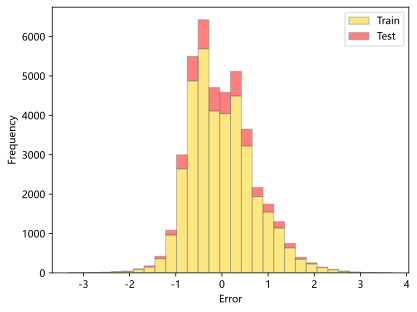

In [5]:
def plot_Error(ghat_train, labels_train, ghat_test, labels_test):
    error_train = ghat_train - labels_train
    error_test = ghat_test - labels_test
    # Create the histogram
    plt.hist(
        [error_train, error_test],
        bins=30,
        stacked=True,
        label=["Train", "Test"],
        color=[[255 / 255, 209 / 255, 0], "red"],
        alpha=0.5,
        edgecolor="grey",
    )

    # Add labels and title
    plt.xlabel("Error")
    plt.ylabel("Frequency")
    plt.legend()

    # save
    plt.savefig(os.path.join(figDir, "error_hist.svg"))

    # Show the plot
    plt.show()


plot_Error(ghat_train, labels_train[:, 0], ghat_test, labels_test[:, 0])

In [6]:
def check_aspect(yhat, labels):
    print(yhat.shape, labels.shape)
    # apply softmax to yhat
    yhat = np.argmax(yhat, axis=-1)
    # count how many zeros in yhat
    print(np.sum(yhat == 0))
    mask = yhat == labels
    print(np.argmax(mask), np.max(mask))


check_aspect(yhat_train, labels_train[:, 1:])

(36850, 18, 4) (36850, 18)
369685
1 True


In [7]:
np.sum(labels_train[:, -3] != -100)

34872

(32967,) (32967,)
[1 2 3] [1. 2. 3.]
labels   1.0   2.0    3.0
yhat                     
1       1229   968     71
2        203  8366   2495
3         11  3682  15942


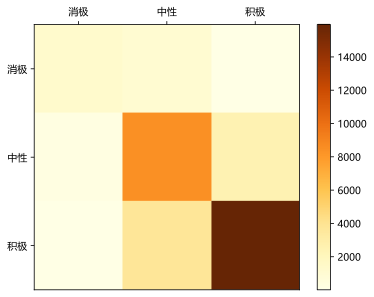

In [8]:
def plot_matrix(yhat, labels):
    yhat = np.argmax(yhat, axis=-1)[:, -3]
    labels = labels[:, -3]
    mask = np.logical_and(labels != -100, yhat != 0)

    yhat = yhat[mask]
    labels = labels[mask]
    print(yhat.shape, labels.shape)
    print(np.unique(yhat), np.unique(labels))
    confusion = pd.crosstab(yhat, labels, rownames=["yhat"], colnames=["labels"])
    print(confusion)
    plt.imshow(
        confusion, cmap="YlOrBr", interpolation="nearest"
    )  # Change color map to yellow
    plt.colorbar()
    plt.xticks([0, 1, 2], ["消极", "中性", "积极"])  # Add x-axis ticks
    plt.yticks([0, 1, 2], ["消极", "中性", "积极"])  # Add y-axis ticks
    plt.gca().xaxis.tick_top()
    plt.savefig(os.path.join(figDir, "confusion_matrix.svg"))
    plt.show()


plot_matrix(yhat_train, labels_train)